In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from kohenen_map import KohonenNetwork
from kohonen_layer_topologies import Topology

In [29]:
df = pd.read_csv('iris.csv').drop("Id", axis=1)
print(df.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


<Figure size 1000x600 with 0 Axes>

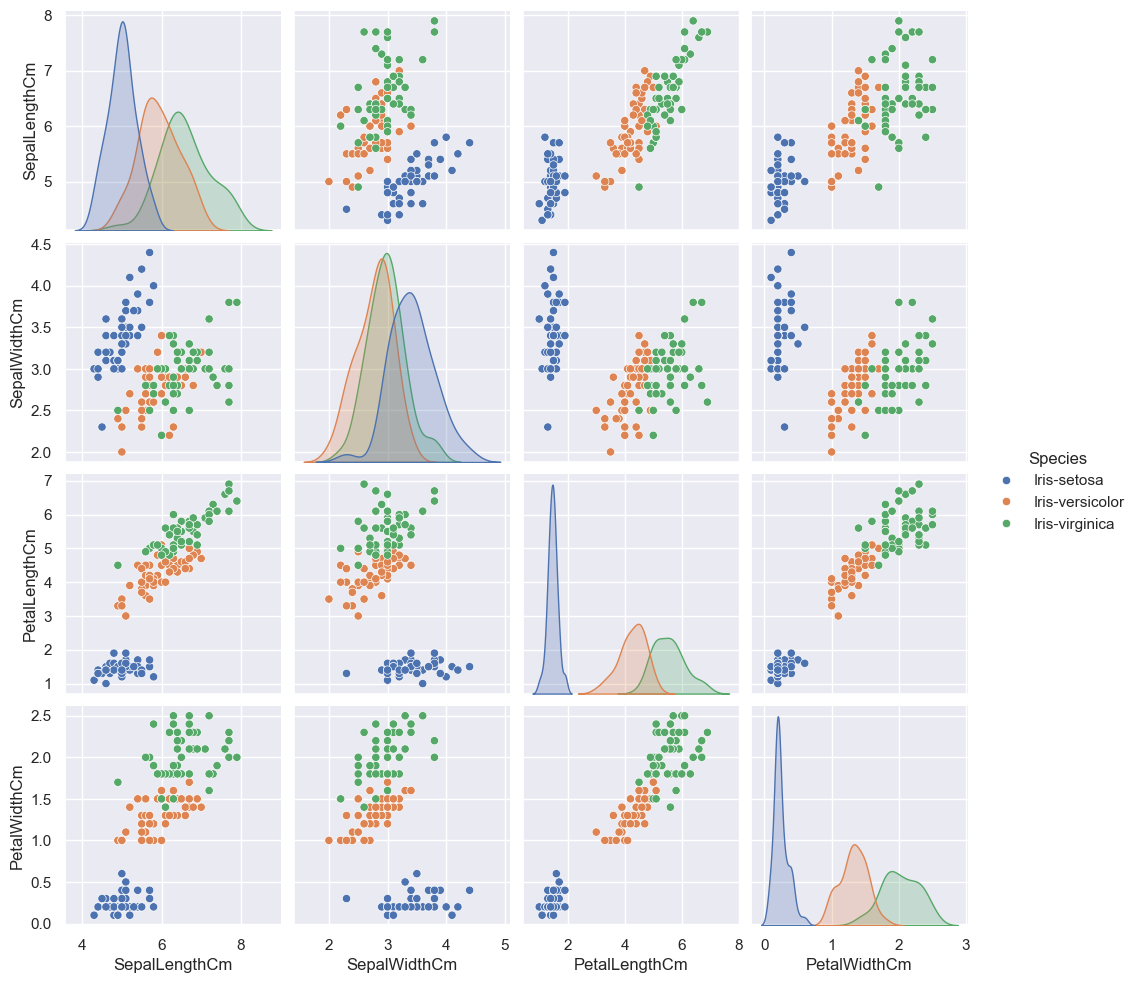

In [30]:
plt.figure(figsize=(10,6))
sns.set_theme(style="darkgrid")
sns.pairplot(data=df, hue="Species")

In [31]:
features = df.drop("Species", axis=1)
normalized_input_patterns = ((features - features.min()) / (features.max() - features.min())).values

In [32]:
from kohenen_map import KohonenNetwork 
from kohonen_layer_topologies import Topology

In [33]:
kohonen = KohonenNetwork(4, 100, (10,10), Topology.RECTANGLE)
num_of_epochs = 100
for i in range(num_of_epochs):
    kohonen.train_network(normalized_input_patterns, 0.2, 5)

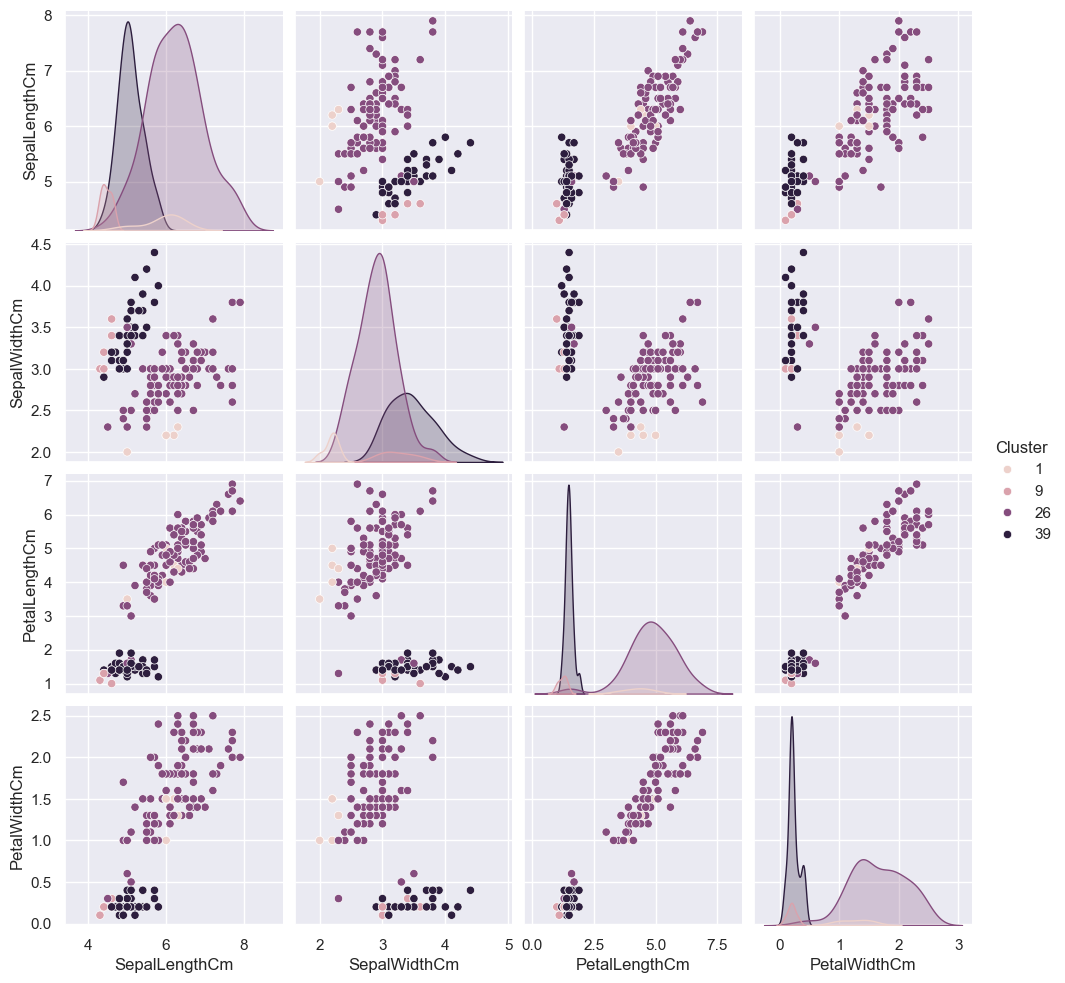

In [34]:
from pandas import DataFrame

predicted_labels = kohonen.predict_labels(normalized_input_patterns)
predicted_df = features.copy(True)
predicted_df["Cluster"] = predicted_labels
sns.pairplot(predicted_df, hue="Cluster")


In [35]:
unique_clusters = predicted_df["Cluster"].unique()
clusters_to_label = {}

for cluster in unique_clusters:
    clusters_to_label[cluster] = []
    
for cluster, species in zip(predicted_df["Cluster"], df["Species"]):
    clusters_to_label[cluster].append(species)
    
clusters_species_percentage = {}
map_clusters = {}
for cluster in clusters_to_label:
    iris_species_count = [0.0,0.0,0.0]
    for species in clusters_to_label[cluster]:
        if species == 'Iris-setosa':
            iris_species_count[0] += 1
        elif species == 'Iris-versicolor':
            iris_species_count[1] += 1
        elif species == 'Iris-virginica':
            iris_species_count[2] += 1
    for i in range(len(iris_species_count)):
        iris_species_count[i] = iris_species_count[i]/len(clusters_to_label[cluster])
    clusters_species_percentage[cluster] = iris_species_count

for cluster in clusters_species_percentage:
    
    most_frequent_species = 0
    biggest_percentage = 0
    for i in range(len(clusters_species_percentage[cluster])):
        species = clusters_species_percentage[cluster][i]
        if species > biggest_percentage:
            most_frequent_species = i
            biggest_percentage = species
            
    species_name = ""
    if most_frequent_species == 0:
        species_name = "Iris-setosa"
    elif most_frequent_species == 1:
        species_name = "Iris-versicolor"
    elif most_frequent_species == 2:
        species_name = "Iris-virginica"
        
    map_clusters[cluster] = species_name
    
print(map_clusters)

for cluster in clusters_species_percentage:
    print(f"Cluster {cluster} -> {clusters_species_percentage[cluster]}")

{np.int64(39): 'Iris-setosa', np.int64(9): 'Iris-setosa', np.int64(26): 'Iris-virginica', np.int64(1): 'Iris-versicolor'}
Cluster 39 -> [1.0, 0.0, 0.0]
Cluster 9 -> [1.0, 0.0, 0.0]
Cluster 26 -> [0.030612244897959183, 0.46938775510204084, 0.5]
Cluster 1 -> [0.0, 0.8, 0.2]


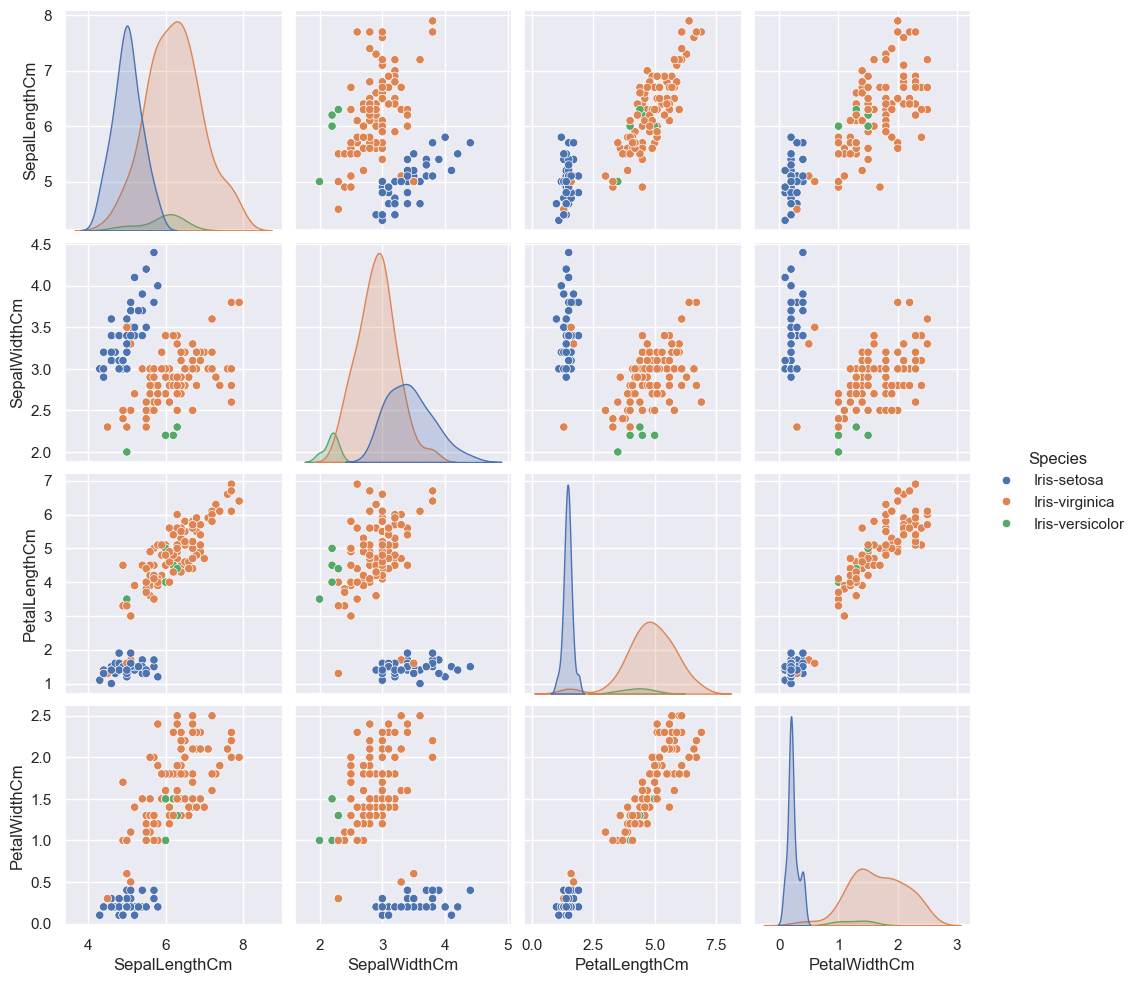

In [42]:
#merge clusters
for i in range(len(predicted_df)):
    predicted_df.at[i, "Species"] = map_clusters[predicted_df.at[i, "Cluster"]]
    
predicted_df.drop(["Cluster"], axis=1, inplace=True)
sns.pairplot(predicted_df, hue="Species")
